## 五、时期及其算术运算
* 时期（period）表示的是时间区间，比如数日、数月、数季等

In [136]:
p = pd.Period(2007,freq = 'A-DEC') # 2007-1-1到2007-12-31之间的整段时间
print(p)
print()
print(p + 5) # 位移
print()
print(p - 5)
pd.Period('2014', freq = 'A-DEC') - p # 如果两个Period对象拥有相同的频率，则差为它们之间的单位数量

2007

2012

2002


7

In [139]:
rng = pd.period_range('1/1/2000', '6/30/2000', freq = 'M') # 创建规则的时期范围
print(rng)
print()
print(pd.Series(np.random.randn(6), index = rng))
print()
values = ['200103','200202','200301']
index = pd.PeriodIndex(values, freq = 'Q-DEC')
print(index)

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='int64', freq='M')

2000-01    1.081385
2000-02    0.242688
2000-03    1.230622
2000-04    1.706861
2000-05    1.069073
2000-06    0.129406
Freq: M, dtype: float64

PeriodIndex(['2003Q1', '2002Q1', '2001Q1'], dtype='int64', freq='Q-DEC')


### 1 时期的频率转换

In [2]:
# 转换成别的频率：asfreq
p = pd.Period('2007', freq = 'A-DEC') # 一个年度时期
print(p.asfreq('M', how = 'start')) # 转换成当年年初的一个月度时期
print()
print(p.asfreq('M', how = 'end')) # 转换成当年年末的一个月度时期

2007-01

2007-12


In [3]:
p = pd.Period('2007', freq = 'A-JUN') # 一个年度时期
print(p.asfreq('M', how = 'start')) 
print()
print(p.asfreq('M', how = 'end')) 

2006-07

2007-06


In [4]:
p = pd.Period('2007-08','M')
p.asfreq('A-JUN')

Period('2008', 'A-JUN')

In [6]:
rng = pd.period_range('2006','2009',freq = 'A-DEC')
ts = pd.Series(np.random.randn(len(rng)), index = rng)
print(ts)
print()
print(ts.asfreq('M', how = 'start'))
ts.asfreq('B',how = 'end')

2006    0.231957
2007    0.888970
2008    0.980349
2009   -0.842368
Freq: A-DEC, dtype: float64

2006-01    0.231957
2007-01    0.888970
2008-01    0.980349
2009-01   -0.842368
Freq: M, dtype: float64


2006-12-29    0.231957
2007-12-31    0.888970
2008-12-31    0.980349
2009-12-31   -0.842368
Freq: B, dtype: float64

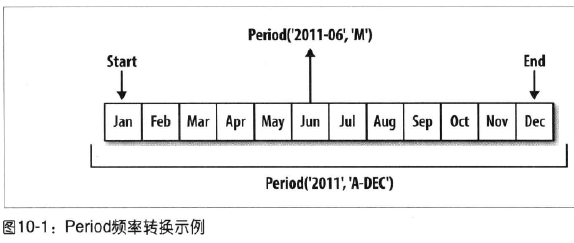

In [8]:
Image(filename="py35_picture\Period.png")

### 2 按季度计算的时期频率

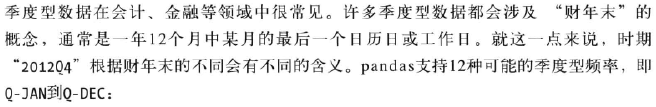

In [9]:
Image(filename="py35_picture\Quarterly Period Frequencies.png")

In [13]:
p = pd.Period('2012Q4', freq = 'Q-JAN')
print(p)
print()
print(p.asfreq('D','start'))
p.asfreq('D','end')

2012Q4

2011-11-01


Period('2012-01-31', 'D')

In [15]:
p4pm = (p.asfreq('B','e') - 1).asfreq('T','s') + 16 * 60 # 获取该季度倒数第二个工作日下午4点的时间戳
print(p4pm)
p4pm.to_timestamp()

2012-01-30 16:00


Timestamp('2012-01-30 16:00:00')

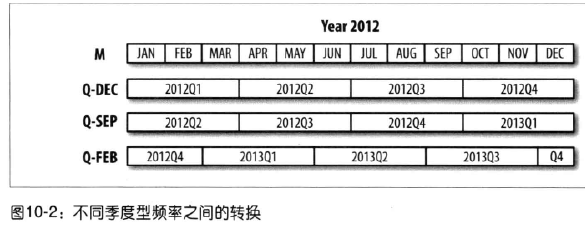

In [16]:
Image(filename="py35_picture\Different quarterly frequency conventions.png")

In [19]:
# 生成季度型范围：period_range
rng = pd.period_range('2011Q3', '2012Q4', freq = 'Q-JAN')
ts = pd.Series(np.arange(len(rng)), index = rng)
print(ts)
new_rng = (rng.asfreq('B','e') - 1).asfreq('T', 's') + 16*60
ts.index = new_rng.to_timestamp()
ts

2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int32


2010-10-28 16:00:00    0
2011-01-28 16:00:00    1
2011-04-28 16:00:00    2
2011-07-28 16:00:00    3
2011-10-28 16:00:00    4
2012-01-30 16:00:00    5
dtype: int32

### 3 将Timestamp转换为Period（及其反向过程）

In [23]:
# 将由时间戳索引的Series和DataFrame对象转换成时期索引：to_period
rng = pd.date_range('1/1/2000', periods = 3, freq = 'M')
ts = pd.Series(np.random.randn(3), index = rng)
pts = ts.to_period()
print(ts)
pts

2000-01-31   -0.013906
2000-02-29   -0.783268
2000-03-31    0.121093
Freq: M, dtype: float64


2000-01   -0.013906
2000-02   -0.783268
2000-03    0.121093
Freq: M, dtype: float64

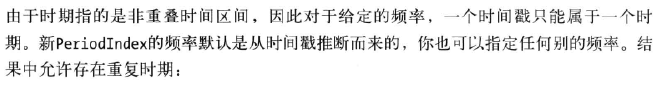

In [24]:
Image(filename="py35_picture\Converting Timestamps to Periods.png")

In [25]:
rng = pd.date_range('1/29/2000', periods = 6, freq = 'D')
ts2 = pd.Series(np.random.randn(6), index = rng)
print(ts2.to_period('M'))
print()
pts = ts.to_period()
print(pts)
pts.to_timestamp(how = 'end')

2000-01    0.025304
2000-01    0.431450
2000-01   -0.283643
2000-02    1.438120
2000-02   -0.339910
2000-02    3.687891
Freq: M, dtype: float64

2000-01   -0.013906
2000-02   -0.783268
2000-03    0.121093
Freq: M, dtype: float64


2000-01-31   -0.013906
2000-02-29   -0.783268
2000-03-31    0.121093
Freq: M, dtype: float64

### 4 通过数组创建 PeriodIndex

In [31]:
# 年度和季度分别存放在不同的列中
data = pd.read_csv('py35_data\macrodata.csv')
print(data.year)
print()
print(data.quarter)

0      1959.0
1      1959.0
2      1959.0
3      1959.0
4      1960.0
5      1960.0
6      1960.0
7      1960.0
8      1961.0
9      1961.0
10     1961.0
11     1961.0
12     1962.0
13     1962.0
14     1962.0
15     1962.0
16     1963.0
17     1963.0
18     1963.0
19     1963.0
20     1964.0
21     1964.0
22     1964.0
23     1964.0
24     1965.0
25     1965.0
26     1965.0
27     1965.0
28     1966.0
29     1966.0
        ...  
173    2002.0
174    2002.0
175    2002.0
176    2003.0
177    2003.0
178    2003.0
179    2003.0
180    2004.0
181    2004.0
182    2004.0
183    2004.0
184    2005.0
185    2005.0
186    2005.0
187    2005.0
188    2006.0
189    2006.0
190    2006.0
191    2006.0
192    2007.0
193    2007.0
194    2007.0
195    2007.0
196    2008.0
197    2008.0
198    2008.0
199    2008.0
200    2009.0
201    2009.0
202    2009.0
Name: year, dtype: float64

0      1.0
1      2.0
2      3.0
3      4.0
4      1.0
5      2.0
6      3.0
7      4.0
8      1.0
9      2.0
10     3

In [32]:
# 将年度和季度合并成DataFrame的一个索引
index = pd.PeriodIndex(year = data.year, quarter = data.quarter, freq = 'Q-DEC')
print(index)

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='int64', length=203, freq='Q-DEC')


In [34]:
data.index = index
print(data.infl)

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
1960Q2    0.14
1960Q3    2.70
1960Q4    1.21
1961Q1   -0.40
1961Q2    1.47
1961Q3    0.80
1961Q4    0.80
1962Q1    2.26
1962Q2    0.13
1962Q3    2.11
1962Q4    0.79
1963Q1    0.53
1963Q2    2.75
1963Q3    0.78
1963Q4    2.46
1964Q1    0.13
1964Q2    0.90
1964Q3    1.29
1964Q4    2.05
1965Q1    1.28
1965Q2    2.54
1965Q3    0.89
1965Q4    2.90
1966Q1    4.99
1966Q2    2.10
          ... 
2002Q2    1.56
2002Q3    2.66
2002Q4    3.08
2003Q1    1.31
2003Q2    1.09
2003Q3    2.60
2003Q4    3.02
2004Q1    2.35
2004Q2    3.61
2004Q3    3.58
2004Q4    2.09
2005Q1    4.15
2005Q2    1.85
2005Q3    9.14
2005Q4    0.40
2006Q1    2.60
2006Q2    3.97
2006Q3   -1.58
2006Q4    3.30
2007Q1    4.58
2007Q2    2.75
2007Q3    3.45
2007Q4    6.38
2008Q1    2.82
2008Q2    8.53
2008Q3   -3.16
2008Q4   -8.79
2009Q1    0.94
2009Q2    3.37
2009Q3    3.56
Freq: Q-DEC, Name: infl, dtype: float64


## 六、重采样及频率转换

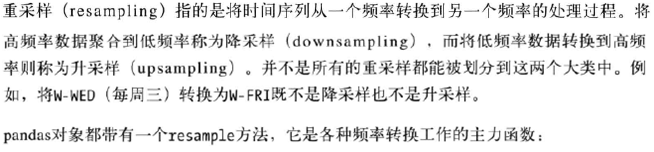

In [35]:
Image(filename="py35_picture\Resampling and Frequency conversions.png")

In [40]:
rng = pd.date_range('1/1/2000', periods = 100, freq = 'D')
ts = pd.Series(np.random.randn(len(rng)), index = rng)
print(ts.resample('M').mean())
ts.resample('M', kind = 'period').mean()

2000-01-31   -0.132660
2000-02-29   -0.084887
2000-03-31    0.002910
2000-04-30    0.577580
Freq: M, dtype: float64


2000-01   -0.132660
2000-02   -0.084887
2000-03    0.002910
2000-04    0.577580
Freq: M, dtype: float64

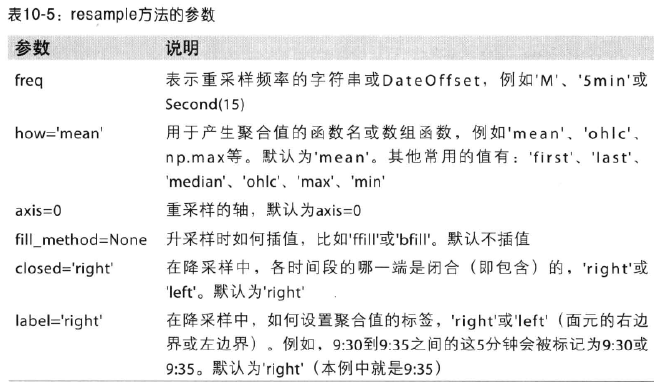

In [41]:
Image(filename="py35_picture\Resampling.png")

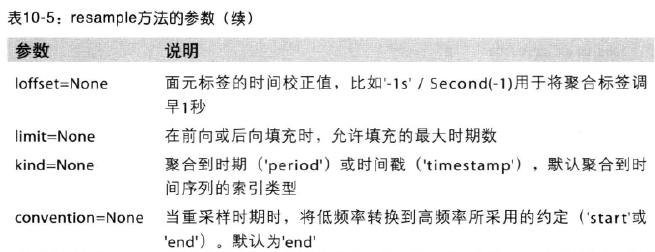

In [42]:
Image(filename="py35_picture\Resampling 2.png")

### 1 降采样

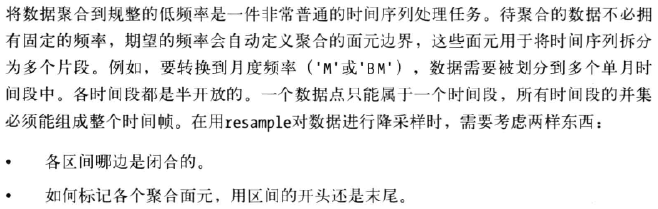

In [43]:
Image(filename="py35_picture\Downsampling.png")

In [44]:
# 一分钟数据
rng = pd.date_range('1/1/2000', periods = 12, freq = 'T')
ts = pd.Series(np.arange(12), index = rng)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int32

In [53]:
# 通过求和的方式将这些数据聚合到‘五分钟’的块中
print(ts.resample('5min').sum()) # 默认左边界是包含的，以左边界的时间戳进行标记
print()
print(ts.resample('5min', closed = 'right').sum()) # 右边界为包含
ts.resample('5min', closed = 'right',label = 'right').sum() # 右边界为时间戳进行标记

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int32

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int32


2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int32

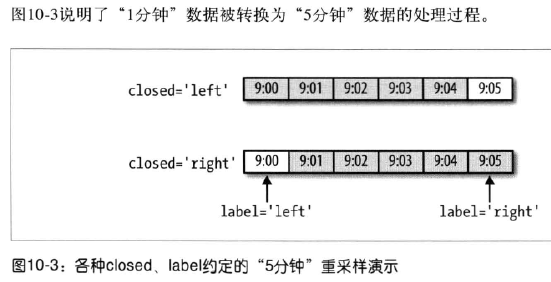

In [54]:
Image(filename="py35_picture\Time conversions.png")

In [55]:
# 位移：减去一秒
ts.resample('5min', loffset = '-1s').sum()

1999-12-31 23:59:59    10
2000-01-01 00:04:59    35
2000-01-01 00:09:59    21
Freq: 5T, dtype: int32

#### 1.1 OHLC重采样

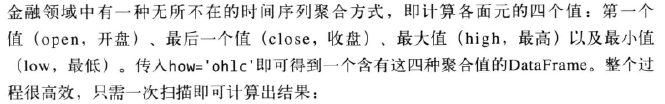

In [56]:
Image(filename="py35_picture\OHLC.png")

In [57]:
ts.resample('5min').ohlc()

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


#### 1.2 通过groupby进行重采样

In [59]:
rng = pd.date_range('1/1/2000', periods = 100, freq = 'D')
ts = pd.Series(np.arange(100), index = rng)
print(ts.groupby(lambda x: x.month).mean())
print()
print(ts.groupby(lambda x: x.weekday).mean())

1    15
2    45
3    75
4    95
dtype: int32

0    47.5
1    48.5
2    49.5
3    50.5
4    51.5
5    49.0
6    50.0
dtype: float64


### 2 升采样和插值

In [62]:
frame = pd.DataFrame(np.random.randn(2, 4),
     index=pd.date_range('1/1/2000', periods=2, freq='W-WED'),
     columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame[:5]

,Colorado,Texas,New York,Ohio
2000-01-05,2.069288,-0.487002,-0.989870,-1.016115
2000-01-12,1.375255,-0.996668,1.399964,0.140222


In [64]:
df_daily = frame.resample('D').mean() # 重采样到日频率，默认会引入缺失值
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,2.069288,-0.487002,-0.989870,-1.016115
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,1.375255,-0.996668,1.399964,0.140222


In [66]:
frame.resample('D').ffill()  # 前面的周期值填充‘非星期三’

,Colorado,Texas,New York,Ohio
2000-01-05,2.069288,-0.487002,-0.989870,-1.016115
2000-01-06,2.069288,-0.487002,-0.989870,-1.016115
2000-01-07,2.069288,-0.487002,-0.989870,-1.016115
2000-01-08,2.069288,-0.487002,-0.989870,-1.016115
2000-01-09,2.069288,-0.487002,-0.989870,-1.016115
2000-01-10,2.069288,-0.487002,-0.989870,-1.016115
2000-01-11,2.069288,-0.487002,-0.989870,-1.016115
2000-01-12,1.375255,-0.996668,1.399964,0.140222


In [69]:
frame.resample('D').ffill(limit = 2) # 只填充指定的时期数（目的是限制前面的观测值的持续使用距离）

,Colorado,Texas,New York,Ohio
2000-01-05,2.069288,-0.487002,-0.989870,-1.016115
2000-01-06,2.069288,-0.487002,-0.989870,-1.016115
2000-01-07,2.069288,-0.487002,-0.989870,-1.016115
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,1.375255,-0.996668,1.399964,0.140222


In [70]:
frame.resample('W-THU').ffill() # 新的日期索引完全没必要跟旧的相交

,Colorado,Texas,New York,Ohio
2000-01-06,2.069288,-0.487002,-0.989870,-1.016115
2000-01-13,1.375255,-0.996668,1.399964,0.140222


### 3 通过时期进行重采样

In [72]:
frame = pd.DataFrame(np.random.randn(24, 4),
 index=pd.period_range('1-2000', '12-2001', freq='M'),
 columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame[:5]

,Colorado,Texas,New York,Ohio
2000-01,-0.083142,1.930622,1.302677,-0.760368
2000-02,0.420126,-0.616364,-2.590996,-1.039241
2000-03,0.459863,-0.210512,-0.759238,0.397434
2000-04,-0.429998,-0.776416,0.572503,0.526587
2000-05,-0.388565,0.799552,-0.400566,-0.726395


In [74]:
annual_frame = frame.resample('A-DEC').mean()
annual_frame

,Colorado,Texas,New York,Ohio
2000,0.360226,0.105087,0.146855,-0.061421
2001,-0.565427,-0.064707,0.413199,-0.433174


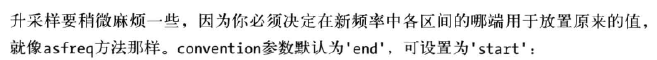

In [75]:
Image(filename="py35_picture\Resampling with Periods.png")

In [78]:
# Q-DEC: 季度型（每年以12月结束）
annual_frame.resample('Q-DEC').ffill()

,Colorado,Texas,New York,Ohio
2000Q1,0.360226,0.105087,0.146855,-0.061421
2000Q2,0.360226,0.105087,0.146855,-0.061421
2000Q3,0.360226,0.105087,0.146855,-0.061421
2000Q4,0.360226,0.105087,0.146855,-0.061421
2001Q1,-0.565427,-0.064707,0.413199,-0.433174
2001Q2,-0.565427,-0.064707,0.413199,-0.433174
2001Q3,-0.565427,-0.064707,0.413199,-0.433174
2001Q4,-0.565427,-0.064707,0.413199,-0.433174


In [81]:
annual_frame.resample('Q-DEC', convention = 'start').ffill()

,Colorado,Texas,New York,Ohio
2000Q1,0.360226,0.105087,0.146855,-0.061421
2000Q2,0.360226,0.105087,0.146855,-0.061421
2000Q3,0.360226,0.105087,0.146855,-0.061421
2000Q4,0.360226,0.105087,0.146855,-0.061421
2001Q1,-0.565427,-0.064707,0.413199,-0.433174
2001Q2,-0.565427,-0.064707,0.413199,-0.433174
2001Q3,-0.565427,-0.064707,0.413199,-0.433174
2001Q4,-0.565427,-0.064707,0.413199,-0.433174


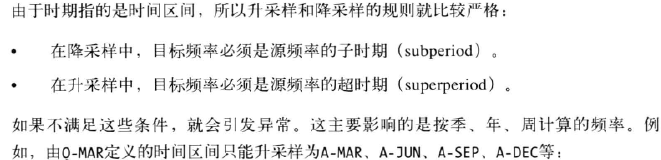

In [76]:
Image(filename="py35_picture\Resampling with Periods 2.png")

In [82]:
annual_frame.resample('Q-MAR').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,0.360226,0.105087,0.146855,-0.061421
2001Q1,0.360226,0.105087,0.146855,-0.061421
2001Q2,0.360226,0.105087,0.146855,-0.061421
2001Q3,0.360226,0.105087,0.146855,-0.061421
2001Q4,-0.565427,-0.064707,0.413199,-0.433174
2002Q1,-0.565427,-0.064707,0.413199,-0.433174
2002Q2,-0.565427,-0.064707,0.413199,-0.433174
2002Q3,-0.565427,-0.064707,0.413199,-0.433174
